# Assignment 03b - Analysis

Name: Hyeong-gi Hong  
Class: INST 447 (0102)  
Favorite Animal: Cat

## Introduction

You've not only cleaned the data; you produced the data. This means that you have a pretty good understanding of what this dataset contains without me telling you its provenance.

Reveal the truths or weaknesses of this dataset to me.

You got this!

### Install vaderSentiment

To run my code,  you will need to install vaderSentiment.

1. Open a command prompt (easiest way is through Anaconda Navigator and to click the arrow for your Environment in the Environments Tab).
2. Type `pip install vadersentiment`
3. If that worked, then you should be able to import it below using: `from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer`

### Import Statements
Don't forget your imports. You probably need more than this? Maybe Pandas, Numpy, some kind of visualiation library?

In [1]:
# Import your libraries here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Create your Pandas DataFrame
Read in the file and make a DataFrame with Pandas.

In [2]:
# Create a DataFrame
df = pd.read_csv('Assignment03.csv')

In [3]:
df.head()

,amazon_identifier,product_name,product_price,review_date,review_title,number_of_stars,verified_purchase,review_body,number_found_helpful
0,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-01-28T00:00:00Z,Pain 100% does bring the heat. It is a ...,5.0,1.0,Pain 100% does bring the heat. It is a tangy s...,0.0
1,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-01-28T00:00:00Z,flavor-wise this one isn't the greatest but be...,3.0,1.0,flavor-wise this one isn't the greatest but be...,0.0
2,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-05T00:00:00Z,Good!!,4.0,1.0,"Pretty good sauce, way too spicy for my taste ...",0.0
3,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-05T00:00:00Z,Worst hot sauce I've ever tried,1.0,0.0,Originally purchased from Bucky's. Worst hot s...,0.0
4,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-27T00:00:00Z,but I love it! I add a few drops to a ...,5.0,1.0,"It is extremely hot, but I love it! I add a fe...",0.0


### Prepare Your DataFrame for Analysis
Are all the data types still correct after import? Just because you cleaned with the data in OpenRefine, it doesn't mean that it will import correctly. Maybe there was an issue? Maybe it got confused? 

In [4]:
# Do all the columns have the correct data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 9 columns):
amazon_identifier       3137 non-null object
product_name            3137 non-null object
product_price           3057 non-null float64
review_date             3137 non-null object
review_title            3043 non-null object
number_of_stars         3134 non-null float64
verified_purchase       3134 non-null float64
review_body             3137 non-null object
number_found_helpful    3127 non-null float64
dtypes: float64(4), object(5)
memory usage: 159.3+ KB


In [5]:
df.isnull().sum()

amazon_identifier        0
product_name             0
product_price           80
review_date              0
review_title            94
number_of_stars          3
verified_purchase        3
review_body              0
number_found_helpful    10
dtype: int64

In [6]:
# No, Somehow, some variable changed to String and float even though they were not supposed to
# Changing date variable to datetime
df['review_date'] = pd.to_datetime(df['review_date'],infer_datetime_format = True)

In [7]:
# Checked original file, and data entry was wrong. Reverting back to correct data
df['number_of_stars'] = df['number_of_stars'].fillna(4)
df['number_of_stars'] = df['number_of_stars'].astype('int64')

In [8]:
df['number_found_helpful'] = df['number_found_helpful'].fillna(0)
df['number_found_helpful'] = df['number_found_helpful'].astype('int64')

df['product_price'] = df['product_price'].fillna(0)

df['verified_purchase'] = df['verified_purchase'].fillna(0)
df['verified_purchase'] = df['verified_purchase'].astype('bool')

### Describe Your DataFrame
What are we looking at? Do you future self a favor and describe the data. Is there missing data? How many columns? What are the columns types?

In [9]:
# There are total 9 columns. There were several NaN values before, but it has been handled.
# Following cell shows the detailed information about the dataframe after cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 9 columns):
amazon_identifier       3137 non-null object
product_name            3137 non-null object
product_price           3137 non-null float64
review_date             3137 non-null datetime64[ns]
review_title            3043 non-null object
number_of_stars         3137 non-null int64
verified_purchase       3137 non-null bool
review_body             3137 non-null object
number_found_helpful    3137 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 150.1+ KB


### Run My Code: Sentiment Analysis

This function takes a row in as an argument. In order to run this code, you need to have this function iterate over the date frame.

This is using the Vader Sentiment analyzer (https://github.com/cjhutto/vaderSentiment) that you installed above. It is calculating the scored. The creators of the tool suggest these thresholds for interpretting the score:
* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

In [10]:
def get_sentiment(row):
    review_body = row['review_body']
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review_body)
    return scores['compound']

In [11]:
df['sentiment'] = df.apply(get_sentiment, axis=1)

In [12]:
df.head()

,amazon_identifier,product_name,product_price,review_date,review_title,number_of_stars,verified_purchase,review_body,number_found_helpful,sentiment
0,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-01-28,Pain 100% does bring the heat. It is a ...,5,True,Pain 100% does bring the heat. It is a tangy s...,0,0.3350
1,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-01-28,flavor-wise this one isn't the greatest but be...,3,True,flavor-wise this one isn't the greatest but be...,0,-0.1862
2,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-05,Good!!,4,True,"Pretty good sauce, way too spicy for my taste ...",0,0.7845
3,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-05,Worst hot sauce I've ever tried,1,False,Originally purchased from Bucky's. Worst hot s...,0,-0.5050
4,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-27,but I love it! I add a few drops to a ...,5,True,"It is extremely hot, but I love it! I add a fe...",0,0.9435


### Analysis

Now that we have the sentiment numbers. Ask and answer a question using pictures. You can use any visualization tool. But I have to be able to see the image, so if you don't generate it in Python, then make sure that you give me the file!

Can we see anything about the length of the review and the sentiment score? Can we see anything about the number of stars and the sentiment score? Does the verified purchase make the review any better? Maybe you see something else interesting?

I want at least three (3) graphs that show me something about the data.

In [13]:
def length_review(row):
    length = len(row['review_body'])
    return length

df['review_len'] = df.apply(length_review, axis=1)

In [14]:
# Plotting to see the relationship between sentiment score with each variable
def variable_compare(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])
    line = slope*df[x]+intercept
    plt.plot(df[x], df[y], 'o', df[x], line)
    plt.title(x + " vs " + y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
def cal_correlation(x, y):
    print("Correlation: %f, P-value: %f" % pearsonr(df[x], df[y]))

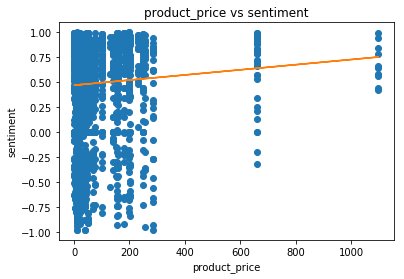

Correlation: 0.061789, P-value: 0.000535


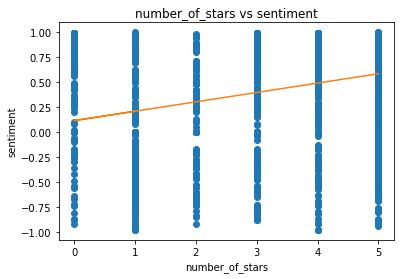

Correlation: 0.319027, P-value: 0.000000


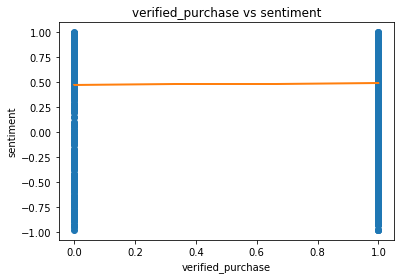

Correlation: 0.012508, P-value: 0.483731


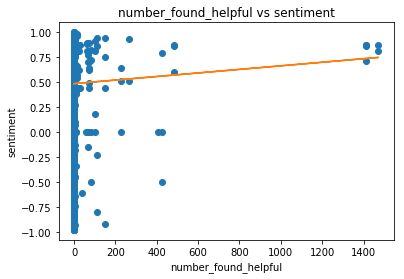

Correlation: 0.025503, P-value: 0.153270


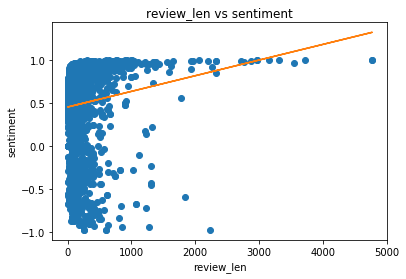

Correlation: 0.121362, P-value: 0.000000


In [15]:
check_list = ['product_price', 'number_of_stars', 'verified_purchase', 'number_found_helpful', 'review_len']

for variable in check_list:
    variable_compare(variable, 'sentiment')
    cal_correlation(variable, 'sentiment')

I have checked the correlation among every factor. However, based on my analysis, the number of stars factor has a little bit of correlation with sentiment score, yet it does not have strong correlation. The rest of factors do not have any correlation at all.